1 : vo=9    deg=35
2 : vo=9    deg=45
3 : vo=11   deg=45
4 : vo=13.5 deg=45
5 : vo=9    deg=55


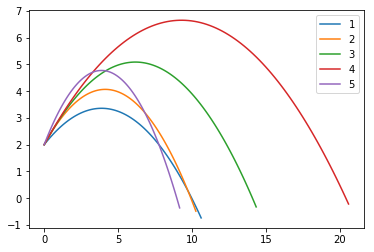

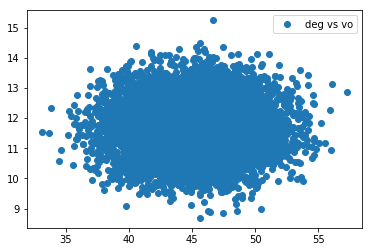

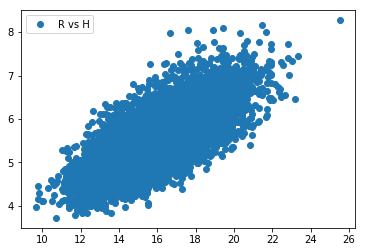

Max R :  25.547379307987075
Max H :  8.271110062908726
Step 0, Loss= 48.424221, Training Accuracy= 1.000
Step 100, Loss= 0.699097, Training Accuracy= 1.000
Step 200, Loss= 0.165781, Training Accuracy= 1.000
Step 300, Loss= 0.146896, Training Accuracy= 1.000
Step 400, Loss= 0.120640, Training Accuracy= 1.000
Step 500, Loss= 0.107364, Training Accuracy= 1.000
Step 600, Loss= 0.131055, Training Accuracy= 1.000
Step 700, Loss= 0.085301, Training Accuracy= 1.000
Step 800, Loss= 0.077463, Training Accuracy= 1.000
Step 900, Loss= 0.070086, Training Accuracy= 1.000
Step 1000, Loss= 0.064262, Training Accuracy= 1.000
Step 1100, Loss= 0.058402, Training Accuracy= 1.000
Step 1200, Loss= 0.054858, Training Accuracy= 1.000
Step 1300, Loss= 0.050469, Training Accuracy= 1.000
Step 1400, Loss= 0.082758, Training Accuracy= 1.000
Step 1500, Loss= 0.044541, Training Accuracy= 1.000
Step 1600, Loss= 0.041270, Training Accuracy= 1.000
Step 1700, Loss= 0.753528, Training Accuracy= 1.000
Step 1800, Loss= 0.0

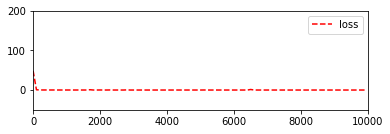

Testing Accuracy: 1.0


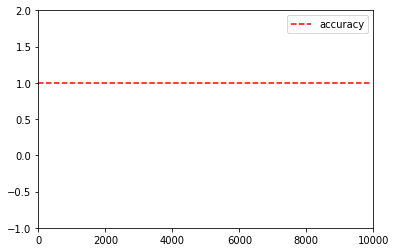

In [2]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf

ho=2
g=9.8
#Ra = (vo**2) * math.sin(deg*math.pi/180 *2) / g
#Rb = 2 / math.tan(deg*math.pi/180)
#R=Ra+Rb
#H = ( vo*math.sin(deg*math.pi/180) )**2 / (2*g) + 2

# 角度為45度+-10度
# 速度為11.5+-2.5

def length( vo ,deg ):
    Ra = (vo**2) * math.sin(deg*math.pi/180 *2) / 9.8
    Rb = 2 / math.tan(deg*math.pi/180)
    R =Ra+Rb
    return (R)

def high( vo ,deg ):
    h = ( vo*math.sin(deg*math.pi/180) )**2 / (2*g) + 2
    return (h)

def times( R,vo,deg ):
    t = R/vo/math.cos(deg*math.pi/180)
    return ( np.linspace(0, t, 100) )

def high_t(vo,deg,t):
    return ( vo*math.sin(deg*math.pi/180)*t - t**2*9.8/2 + 2 )

t1_data = times( length(9,35),9,35 )
x1_data = t1_data*9*math.cos(35*math.pi/180)
t2_data = times( length(9,45),9,45 )
x2_data = t2_data*9*math.cos(45*math.pi/180)
t3_data = times( length(11,45),11,45 )
x3_data = t3_data*11*math.cos(45*math.pi/180)
t4_data = times( length(13.5,45),13.5,45 )
x4_data = t4_data*13.5*math.cos(45*math.pi/180)
t5_data = times( length(9,55),9,55 )
x5_data = t5_data*9*math.cos(55*math.pi/180)

print('1 : vo=9    deg=35')
print('2 : vo=9    deg=45')
print('3 : vo=11   deg=45')
print('4 : vo=13.5 deg=45')
print('5 : vo=9    deg=55')
plt.plot( x1_data,  high_t(9,35,t1_data), label='1' )
plt.plot( x2_data,  high_t(9,45,t2_data), label='2' )
plt.plot( x3_data,  high_t(11,45,t3_data), label='3' )
plt.plot( x4_data,  high_t(13.5,45,t4_data), label='4' )
plt.plot( x5_data,  high_t(9,55,t5_data), label='5' )
plt.legend()
plt.show()

number_of_points=10000
deg_point=[]
vo_point=[]
R_point=[]
H_point=[]
points = [[], []]
acc_point =[]

for i in range(number_of_points):
    deg = 45.0 + np.random.normal(0.1, 3.1)
    vo = 11.5 + np.random.normal(0.2, 0.8)
    deg_point.append(deg)
    vo_point.append(vo)
    R = (vo**2)*math.sin(deg*math.pi/180*2)/g + 2/math.tan(deg*math.pi/180)
    H = ( vo*math.sin(deg*math.pi/180) )**2 / (2*g) + 2
    R_point.append(R)
    H_point.append(H)

plt.plot( deg_point, vo_point , 'o', label='deg vs vo' )
#plt.plot( R_point, H_point , 'o', label='R vs H' )
plt.legend()
plt.show()

plt.plot( R_point, H_point , 'o', label='R vs H' )
plt.legend()
plt.show()

print( "Max R : ", max(R_point) )
print( "Max H : ", max(H_point) )


#data package
inputs=np.array([vo_point,deg_point],dtype=np.float32).transpose()
outcome=np.array([R_point,H_point],dtype=np.float32).transpose()

with tf.variable_scope('inputs',reuse=tf.AUTO_REUSE):
    tf_inputs=tf.placeholder(tf.float32,[None,2],name='inputs')
with tf.variable_scope('outcome',reuse=tf.AUTO_REUSE):
    tf_outcome=tf.placeholder(tf.float32,[None,2],name='outcome')

#NN
with tf.variable_scope('Net',reuse=tf.AUTO_REUSE):
    L1=tf.layers.dense(tf_inputs,16,tf.nn.relu,name='hidden_layer1')
    L2=tf.layers.dense(L1,64,tf.nn.relu,name='hidden_layer2')
    L3=tf.layers.dense(L2,16,tf.nn.relu,name='hidden_layer3')
    output=tf.layers.dense(L3,2)
    
#construct model
logits=output
prediction=tf.nn.softmax(logits)

#loss function,optimizer,initialization,accuracy
loss_op=tf.losses.mean_squared_error(tf_outcome,output,scope='loss')

with tf.variable_scope('train_op',reuse=tf.AUTO_REUSE):
    train_op=tf.train.AdamOptimizer(0.005).minimize(loss_op)

init=tf.global_variables_initializer()
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
#train_op = optimizer.minimize(loss)
#evaluate model
correct_pred=tf.equal(tf.argmax(prediction,1),tf.argmax(tf_outcome,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

#session run
with tf.Session() as sess:
    sess.run(init)
    for step in range(10000):
        _,L,predic=sess.run([train_op,loss_op,output],feed_dict={tf_inputs:inputs,tf_outcome:outcome})
        if step%100==0:
            loss,acc=sess.run([loss_op,accuracy],feed_dict={tf_inputs:inputs,tf_outcome:outcome})
            print("Step " + str(step) + ", Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            points[0].append(step+1)
            points[1].append(loss)
            acc_point.append(acc)
            
    print('Optimization Finished!')
    
    ax3=plt.subplot(212)
    plt.sca(ax3)
    plt.plot(points[0], points[1] , 'r--', label='loss')
    plt.axis([0, number_of_points, -50, 200])
    plt.legend()
    plt.show()
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={tf_inputs:inputs,tf_outcome:outcome}))

    plt.plot(points[0], acc_point , 'r--', label='accuracy')
    plt.axis([0, number_of_points, -1, 2])
    plt.legend()
    plt.show()
